In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px


In [2]:
companies = pd.read_csv('data/NETSData2022_RAFI(WithAddresses).txt', delimiter = '\t', encoding = 'ISO-8859-1')
naics = pd.read_csv('data/NAICS2022_RAFI.csv')
industry = pd.read_csv('data/2022-NAICS-Codes-6-digit.csv')


/var/folders/gb/7v068m41117fznc0hh2hds0r0000gn/T/ipykernel_6615/1867838935.py:1: DtypeWarning: Columns (286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.
  companies = pd.read_csv('data/NETSData2022_RAFI(WithAddresses).txt', delimiter = '\t', encoding = 'ISO-8859-1')


In [3]:
companies.columns

Index(['DunsNumber', 'Compan', 'TradeName', 'Address', 'City', 'State',
       'ZipCode', 'ZIP4', 'Officer', 'Title',
       ...
       'Cottage', 'FirstYear', 'LastYear', 'Address_First', 'City_First',
       'State_First', 'ZipCode_First', 'CBSA_First', 'FipsCounty_First',
       'CityCode_First'],
      dtype='object', length=422)

In [129]:
companies

,DunsNumber,Compan,TradeName,Address,City,State,ZipCode,ZIP4,Officer,Title,...,NAICS14,NAICS15,NAICS16,NAICS17,NAICS18,NAICS19,NAICS20,NAICS21,NAICS22,Latest_NAICS
0,1663876,BROCKS BRONCO BALLS ...,...,5772 E IRONWOOD BLF ...,CAVE CREEK,AZ,85331,7708,LEE PALLO,OWNER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311611.0
1,2344232,WATSONS QULTY TURKEY PDTS INC ...,...,641 STATE RTE 168 ...,BLACKWOOD,NJ,8012,0,ALBERT O WATSON,PRESIDENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311615.0
2,2842160,GETZ LAND AND CATTLE ...,...,5673 COUNTY ROAD H ...,GOVE,KS,67736,6024,,,...,NaN,NaN,NaN,NaN,424520.0,424520.0,424520.0,NaN,NaN,424520.0
3,2841830,T F LIVESTOCK ...,...,10023 STONY POINT DR ...,WACO,TX,76712,3173,CINDY POTTS,PRINCIPAL,...,424520.0,424520.0,424520.0,NaN,NaN,NaN,NaN,NaN,NaN,424520.0
4,2841589,C & B LIVESTOCK ...,...,24502 S SPRINGWATER RD ...,ESTACADA,OR,97023,9631,,,...,NaN,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71027,969733711,MONTEREY GOURMET FOODS INC ...,...,2315 MOORE AVE ...,FULLERTON,CA,92833,2510,YOUNG CHUL KANG,PRESIDENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311611.0
71028,969852982,KONEQUES CANDIES ...,...,2272 SACRAMENTO ST ...,VALLEJO,CA,94590,2929,SHAWNTE WINGATE,CHIEF EXECUTIVE OFFICER,...,311611.0,311611.0,311611.0,311611.0,311611.0,311611.0,311611.0,311611.0,311611.0,311611.0
71029,968759621,C L SAIGON INC ...,...,126 FEDERAL ST ...,PHILADELPHIA,PA,19147,5410,GINA TRAN,PRESIDENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311611.0
71030,969885888,BERGHOLZ RODNEY M ...,...,N7319 COUNTY ROAD A ...,JOHNSON CREEK,WI,53038,9737,RODNEY BERGHOLZ,PRINCIPAL,...,424520.0,424520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424520.0


In [131]:
naics

,DunsNumber,NAICS90,NAICS91,NAICS92,NAICS93,NAICS94,NAICS95,NAICS96,NAICS97,NAICS98,...,NAICS15,NAICS16,NAICS17,NAICS18,NAICS19,NAICS20,NAICS21,NAICS22,Latest_NAICS,First_NAICS
0,18641655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,424520.0,424520.0,424520.0,424520.0,424520.0
1,18642408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,424520.0,424520.0,NaN,NaN,NaN,NaN,NaN,NaN,424520.0,424520.0
2,18732711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0
3,18736558,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424520.0,424520.0
4,18748044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424520.0,424520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71027,830285664,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424520.0,424520.0
71028,830337580,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,...,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0,424520.0
71029,830338182,NaN,NaN,NaN,NaN,NaN,424520.0,424520.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424520.0,424520.0
71030,830341186,NaN,NaN,NaN,NaN,NaN,424520.0,424520.0,424520.0,424520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424520.0,424520.0


In [124]:
naics_columns = [col for col in naics.columns if 'NAICS' in col]
naics_columns_reversed = naics_columns[::-1]
naics['Latest_NAICS'] = naics[naics_columns_reversed].bfill(axis=1).iloc[:, 0]
naics['First_NAICS'] = naics[naics_columns].bfill(axis = 1).iloc[:,0]
(naics['First_NAICS'] == naics['Latest_NAICS']).count()

In [132]:
companies_columns = [col for col in companies.columns if 'NAICS' in col]
companies_columns_reversed = companies_columns[::-1]
companies['Latest_NAICS'] = companies[companies_columns_reversed].bfill(axis=1).iloc[:, 0]
companies['First_NAICS'] = companies[companies_columns].bfill(axis = 1).iloc[:,0]
(companies['First_NAICS'] == companies['Latest_NAICS']).count()
#seems like no company changed their industry

71032

In [5]:
companies = companies.merge(naics, on = 'DunsNumber')

In [6]:
industry_count = companies.groupby('Latest_NAICS')[['DunsNumber']].count().reset_index().sort_values(by = 'DunsNumber')
industry_count


,Latest_NAICS,DunsNumber
0,1124.0,1
139,339994.0,1
140,339999.0,1
142,423120.0,1
143,423140.0,1
...,...,...
190,445240.0,237
80,311613.0,1093
81,311615.0,2225
78,311611.0,8180


In [7]:
industry_count.merge(industry, left_on = 'Latest_NAICS', right_on = 'NAICS22 Code')

,Latest_NAICS,DunsNumber,NAICS22 Code,NAICS22 Text
0,339994.0,1,339994,"Broom, Brush, and Mop Manufacturing"
1,339999.0,1,339999,All Other Miscellaneous Manufacturing
2,423120.0,1,423120,Motor Vehicle Supplies and New Parts Merchant ...
3,423140.0,1,423140,Motor Vehicle Parts (Used) Merchant Wholesalers
4,423210.0,1,423210,Furniture Merchant Wholesalers
...,...,...,...,...
404,445240.0,237,445240,Meat Retailers
405,311613.0,1093,311613,Rendering and Meat Byproduct Processing
406,311615.0,2225,311615,Poultry Processing
407,311611.0,8180,311611,Animal (except Poultry) Slaughtering


**Auction Houses**

In [123]:
auction = companies[companies['Latest_NAICS'] == 424520.0]

**Geographic Info**

In [230]:
auction_map = auction.groupby('State').count().reset_index()[['State','NAICS22','NAICS90']]

Text(0.5, 1.0, 'Number of Auction Houses in 2022')

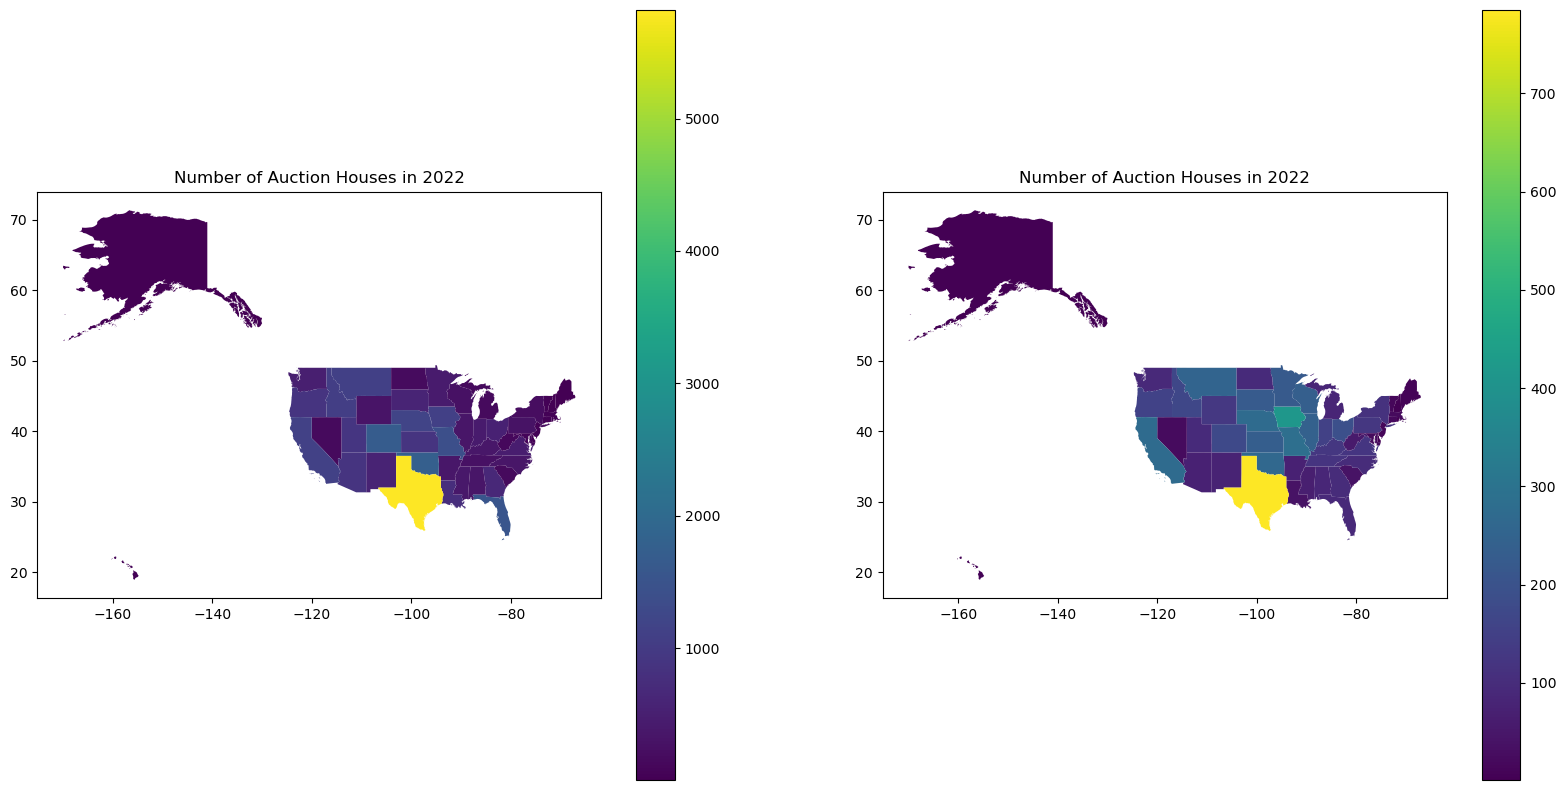

In [232]:
us_map = gpd.read_file('data/states.geojson')


map_df = us_map.merge(auction_map, how='left', left_on='STUSPS',right_on='State')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

map_df.plot(ax=ax1,column='NAICS22', cmap='viridis', legend=True)
ax1.set_title('Number of Auction Houses in 2022')

map_df.plot(ax=ax2,column='NAICS90', cmap='viridis', legend=True)
ax2.set_title('Number of Auction Houses in 2022')

In [238]:
fig = px.choropleth(map_df,
                    geojson=map_df.geometry,
                    locations=map_df.index,
                    color='NAICS22',  # This is the column you want to use for color scale
                    hover_name='State',  # This is the column you want to show on hover
                    hover_data={'NAICS22': True, 'NAICS90' : True}, 
                    labels={'NAICS22': 'Count in 2022', 'NAICS90': 'Count in 1990'},
                    title = 'Auction House geographic information(2022)'
                    )
fig.show()



**Years in Business**

In [114]:
year = []
for i in range(1990,2023):
    column_name = 'NAICS' + str(i)[2:4]
    year.append(column_name)


In [115]:
auction['Years in Business'] = auction[year].count(axis=1)

/var/folders/gb/7v068m41117fznc0hh2hds0r0000gn/T/ipykernel_6615/2076053562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auction['Years in Business'] = auction[year].count(axis=1)


In [121]:
auction['Years in Business'].describe()

count    56643.000000
mean         7.962537
std          7.685896
min          1.000000
25%          3.000000
50%          5.000000
75%         11.000000
max         33.000000
Name: Years in Business, dtype: float64

**Revenue for Auction Houses Over the years**

In [61]:
revenue = []
auction_count = []
for i in range(1990,2023):
    sales = "Sales"+str(i)[2:4]
    count = 'NAICS'+str(i)[2:4]
    revenue.append(round(auction[sales].sum()/1000000,2))
    auction_count.append(auction[count].count())

In [62]:
auction_revenue_overtime = pd.DataFrame({'Year': range(1990, 2023)})
auction_revenue_overtime['Revenue(Millions)'] = revenue
auction_revenue_overtime['Revenue/Auction(Thousands)'] = [round(a / b * 1000, 2) for a, b in zip(revenue, auction_count)]
auction_revenue_overtime['Count'] = auction_count



In [63]:
auction_revenue_overtime

,Year,Revenue(Millions),Revenue/Auction(Thousands),Count
0,1990,12128.85,1848.91,6560
1,1991,12467.65,1804.81,6908
2,1992,14029.59,2112.57,6641
3,1993,13169.51,1914.45,6879
4,1994,12900.67,1851.68,6967
5,1995,12171.00,1742.45,6985
6,1996,12152.65,1706.11,7123
7,1997,11732.73,1573.60,7456
8,1998,11591.68,1526.63,7593
9,1999,11148.32,1427.81,7808


Text(0.5, 1.0, 'Revenue of auction houses over the years')

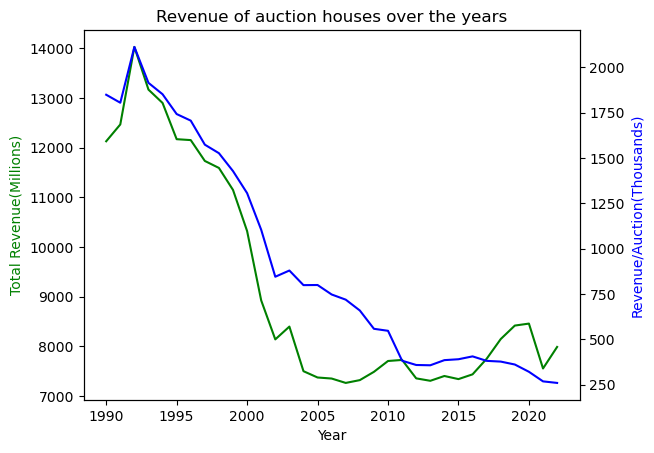

In [71]:
fig, ax1 = plt.subplots()

ax1.plot(auction_revenue_overtime['Year'], auction_revenue_overtime['Revenue(Millions)'], 'g-')  # 'g-' is for green solid line
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Revenue(Millions)', color='g')

ax2 = ax1.twinx()  
ax2.plot(auction_revenue_overtime['Year'], auction_revenue_overtime['Revenue/Auction(Thousands)'], 'b-')  
ax2.set_ylabel('Revenue/Auction(Thousands)', color='b')
plt.title("Revenue of auction houses over the years")


Text(0.5, 1.0, 'Count of Auction Houses(1990-2022)')

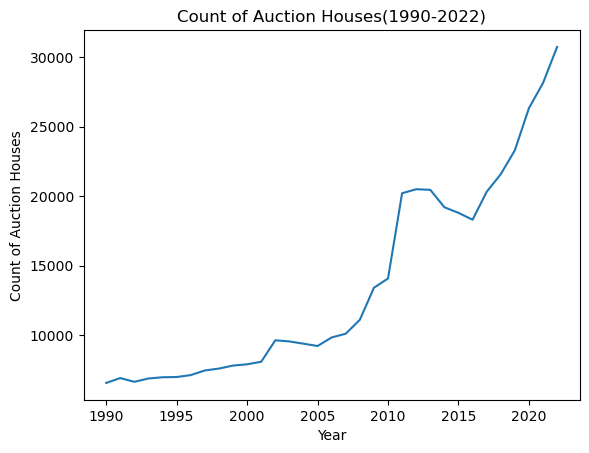

In [73]:
plt.plot(auction_revenue_overtime['Year'], auction_revenue_overtime['Count'])
plt.xlabel('Year')
plt.ylabel('Count of Auction Houses')
plt.title('Count of Auction Houses(1990-2022)')
